In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/order_churn_data.csv")

In [3]:
df.head().T

,0,1,2,3,4
customer_db_id,54478736d4cde82247f1345f,54478736d4cde82247f1345f,54478fa4d3cde8d17ca5e4db,54478fa4d3cde8d17ca5e4db,5447eefcd3cde8cf7ca5e4eb
order_id,GB-A-69332,GB-R-37069,GB-A-74327,GB-P-85553,GB-D-01300
order_db_id,54478738d2cde8320d9b58d2,5447883bd4cde82147f1345c,54478fa5d4cde82847f1345e,551931f5d2cde8e8582d7248,5447eeffd4cde82247f1346f
order_x,51.5163,51.5163,51.5163,51.5163,51.5163
order_y,-0.120728,-0.120728,-0.120765,-0.134493,-0.120728
pickup_timeslot_from_datetime,2014-10-22 12:30:00,2014-10-22 12:30:00,2014-10-27 09:30:00,2015-03-31 09:30:00,2014-10-22 19:30:00
pickup_timeslot_to_datetime,2014-10-22 13:00:00,2014-10-22 13:00:00,2014-10-27 10:00:00,2015-03-31 10:00:00,2014-10-22 20:00:00
pickup_zip,WC2B 5,WC2B 5,WC2B 5,W1D 1BS,WC2B 5
order_state,canceled,canceled,canceled,completed,canceled
order_created_datetime,2014-10-22 11:30:16,2014-10-22 11:34:35,2014-10-22 12:06:13,2015-03-30 12:22:29,2014-10-22 18:53:03


In [4]:
df.columns

Index(['customer_db_id', 'order_id', 'order_db_id', 'order_x', 'order_y',
       'pickup_timeslot_from_datetime', 'pickup_timeslot_to_datetime',
       'pickup_zip', 'order_state', 'order_created_datetime', 'service_class',
       'software_type', 'origin', 'city', 'voucher_channel',
       'final_click_channel', 'final_click_no_voucher', 'gender',
       'product_type', 'revenue', 'aov', 'num_orders', 'frequency', 'segment',
       'activity_state', 'order_num', 'last_order', 'recency', 'churn_factor',
       'fac_name', 'reclean_order', 'rating', 'rating_cleaning quality',
       'rating_damaged item', 'rating_driver conduct',
       'rating_ironing quality', 'rating_missing items', 'rating_punctuality',
       'customer_reschedule', 'internal_reschedule', 'driver_db_id_DO',
       'driver_db_id_PU', 'punctual_mins_DO', 'punctual_mins_PU',
       'timeslot_mins_DO', 'timeslot_mins_PU', 'punctual',
       'punctual_mins_ratio_DO', 'punctual_mins_ratio_PU', 'voucher_value',
       'ref

# Facilities

In [5]:
df['experience'] = 'good'
df.loc[
    (df.reclean_order == 1) |
    (df.rating < 4) |
    (df.refund.isin(['SUCCESS', 'NO SUCCESS'])) |
    (df.internal_reschedule > 1) |
    (df.punctual == 0), 'experience'] = 'bad'

In [6]:
df_fac = df.loc[~df.fac_name.isnull()]

In [26]:
a = df_fac.groupby(['fac_name', 'experience'])['customer_db_id'].nunique().reset_index()
a.head()

,fac_name,experience,customer_db_id
0,Aqua Clean,bad,329
1,Aqua Clean,good,762
2,Atelier Cassette,bad,167
3,Atelier Cassette,good,402
4,Atelier Pichat,bad,1144


In [30]:
df_fac.to_csv('./data/fac_experience.csv', index=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

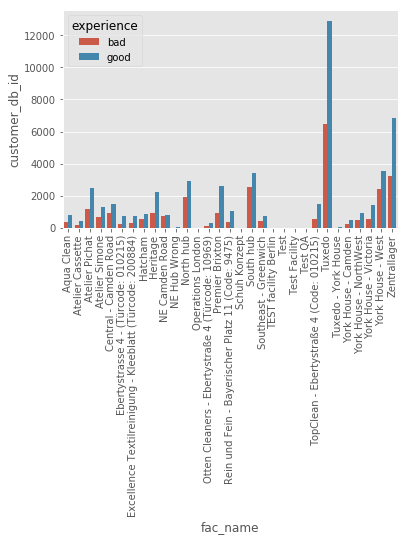

In [28]:
sns.categorical.barplot(data=a, x='fac_name', y='customer_db_id', hue='experience')
plt.xticks(rotation=90)

In [ ]:
# CHURN

In [ ]:
df['churned'] = [True if x >= 1 else False for x in df.churn_factor]
df.groupby(['churned'])['customer_db_id'].nunique()

In [ ]:
df_churn = df.loc[(df.churned)]
df_active = df.loc[~(df.churned)]

df_churn = df_churn.groupby('fac_name')['customer_db_id'].nunique() / df_churn.shape[0]
df_active = df_active.groupby('fac_name')['customer_db_id'].nunique() / df_active.shape[0]
df_diff = df_churn - df_active
df_all = pd.concat([df_churn, df_active, df_diff], 
              axis=1, keys=['churn', 'active', 'diff'], sort=True)
df_all['total'] = df_all['churn'] + df_all['active']
df_all['relative_churn'] = df_all['churn'] / df_all['total']
df_all['relative_active'] = df_all['active'] / df_all['total']
df_all = df_all.sort_values('relative_churn', ascending=True)
df_all[['relative_churn', 'relative_active']].plot(kind='bar', title='fac_name', stacked=True)